# nn_torch

>  nn_torch


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp torch

In [ ]:
import torch
import numpy as np

In [ ]:
torch.cuda.is_available()

True

## Autograd

In [ ]:
x = torch.tensor([1,2,3], dtype=torch.float, requires_grad = True)
x

tensor([1., 2., 3.], requires_grad=True)

## Containers

### Module

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

In [ ]:
@torch.no_grad()
def init_weights(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.fill_(1.0)
        print(m.weight)

In [ ]:
net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
new = net.apply(init_weights)

Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)


In [ ]:
model = Model()
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [ ]:
model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('conv1',
               Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))),
              ('conv2', Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1)))])}

In [ ]:
for para in model.parameters():
    print(para.shape)

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([20, 20, 5, 5])
torch.Size([20])


### Sequential

In [ ]:
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

In [ ]:
model

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

### ModuleList

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

In [ ]:
model = MyModule()
model

MyModule(
  (linears): ModuleList(
    (0-9): 10 x Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.choices = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
        })
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['prelu', nn.PReLU()]
        ])

    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return x

In [ ]:
model = MyModule()
model

MyModule(
  (choices): ModuleDict(
    (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (activations): ModuleDict(
    (lrelu): LeakyReLU(negative_slope=0.01)
    (prelu): PReLU(num_parameters=1)
  )
)

### ParameterList

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(10, 10)) for i in range(10)])

    def forward(self, x):
        # ParameterList can act as an iterable, or be indexed using ints
        for i, p in enumerate(self.params):
            x = self.params[i // 2].mm(x) + p.mm(x)
        return x

In [ ]:
model = MyModule()
model

MyModule(
  (params): ParameterList(
      (0): Parameter containing: [torch.float32 of size 10x10]
      (1): Parameter containing: [torch.float32 of size 10x10]
      (2): Parameter containing: [torch.float32 of size 10x10]
      (3): Parameter containing: [torch.float32 of size 10x10]
      (4): Parameter containing: [torch.float32 of size 10x10]
      (5): Parameter containing: [torch.float32 of size 10x10]
      (6): Parameter containing: [torch.float32 of size 10x10]
      (7): Parameter containing: [torch.float32 of size 10x10]
      (8): Parameter containing: [torch.float32 of size 10x10]
      (9): Parameter containing: [torch.float32 of size 10x10]
  )
)

### ParameterDict

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.ParameterDict({
                'left': nn.Parameter(torch.randn(5, 10)),
                'right': nn.Parameter(torch.randn(5, 10))
        })

    def forward(self, x, choice):
        x = self.params[choice].mm(x)
        return x

In [ ]:
model = MyModule()
model

MyModule(
  (params): ParameterDict(
      (left): Parameter containing: [torch.FloatTensor of size 5x10]
      (right): Parameter containing: [torch.FloatTensor of size 5x10]
  )
)

## Convolution Layers 

### nn.Conv1d

In [ ]:
input1 = torch.torch.tensor([[[[ 1.,  2.,  3., 4., 5.],
                                  [ 6.,  7.,  8., 9., 10.],
                                  [11., 12., 13., 14., 15.],
                                  [16., 17., 18., 19., 20.]]]])

In [ ]:
new = input1.reshape(4,5)
new

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.]])

In [ ]:
m = nn.Conv1d(4, 2, 3, stride=2)
type(m)

torch.nn.modules.conv.Conv1d

In [ ]:
for para in m.parameters():
    print(para.shape)

torch.Size([2, 4, 3])
torch.Size([2])


In [ ]:
# input = torch.randn(20, 16, 50)
output = m(new)

In [ ]:
output.shape

torch.Size([2, 2])

In [ ]:
output

tensor([[-1.3600, -1.1102],
        [ 6.1355,  6.0188]], grad_fn=<SqueezeBackward1>)

### nn.Conv2d

In [ ]:
new = input1.reshape(4, 5,1)
new

tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]]])

In [ ]:
# With square kernels and equal stride
m = nn.Conv2d(4, 2, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(4, 2, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(4, 2, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

output = m(new)
output.shape

torch.Size([2, 4, 1])

In [ ]:
output

tensor([[[-1.3839],
         [-1.8465],
         [-0.8563],
         [-0.0644]],

        [[ 1.2715],
         [ 1.5135],
         [-2.8098],
         [-3.2210]]], grad_fn=<SqueezeBackward1>)

### nn.Conv3d

In [ ]:
# With square kernels and equal stride
m = nn.Conv3d(16, 33, 3, stride=2)
# non-square kernels and unequal} stride and with padding
m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output = m(input)

In [ ]:
output.shape

torch.Size([20, 33, 8, 50, 99])

### nn.ConvTranspose2d


> This module can be seen as the gradient of Conv2d with respect to its input. It is also known as a fractionally-strided convolution or a deconvolution (although it is not an actual deconvolution operation as it does not compute a true inverse of convolution).

In [ ]:
# With square kernels and equal stride
m = nn.ConvTranspose2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.ConvTranspose2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.shape

torch.Size([20, 33, 93, 100])

In [ ]:
# exact output size can be also specified as an argument
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
h = downsample(input)
h.size()

torch.Size([1, 16, 6, 6])

In [ ]:
output = upsample(h, output_size=input.size())
output.size()

torch.Size([1, 16, 12, 12])

## Pooling Layers

### nn.MaxPool2d

> Applies a 2D max pooling over an input signal composed of several input planes.

In [ ]:
new = input1.reshape(1, 4,5)
new

tensor([[[ 1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10.],
         [11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20.]]])

In [ ]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
m = nn.MaxPool2d((2, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(new)
output

tensor([[[ 7.,  8.,  9., 10.],
         [17., 18., 19., 20.]]])

### nn.MaxUnpool2d

> Computes a partial inverse of MaxPool2d.

In [ ]:
input = torch.tensor([[[[ 1.,  2.,  3.,  4.],
                            [ 5.,  6.,  7.,  8.],
                            [ 9., 10., 11., 12.],
                            [13., 14., 15., 16.]]]])

In [ ]:
pool = nn.MaxPool2d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)

output, indices = pool(input)
unpool(output, indices)

tensor([[[[ 0.,  0.,  0.,  0.],
          [ 0.,  6.,  0.,  8.],
          [ 0.,  0.,  0.,  0.],
          [ 0., 14.,  0., 16.]]]])

In [ ]:
input1

tensor([[[[ 1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10.],
          [11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20.]]]])

In [ ]:
output, indices = pool(input1)
# This call will not work without specifying output_size
unpool(output, indices, output_size=input1.size())

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  7.,  0.,  9.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0., 17.,  0., 19.,  0.]]]])

### nn.AvgPool2d

> Applies a 2D average pooling over an input signal composed of several input planes.

In [ ]:
input1

tensor([[[[ 1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10.],
          [11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20.]]]])

In [ ]:
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((2, 2), stride=(1, 1))
# input = torch.randn(20, 16, 50, 32)
output = m(input1)
output

tensor([[[[ 4.,  5.,  6.,  7.],
          [ 9., 10., 11., 12.],
          [14., 15., 16., 17.]]]])

### nn.FractionalMaxPool2d

> Applies a 2D fractional max pooling over an input signal composed of several input planes.

In [ ]:
# pool of square window of size=3, and target output size 13x12
m = nn.FractionalMaxPool2d(3, output_size=(13, 12))
# pool of square window and target output size being half of input image size
m = nn.FractionalMaxPool2d(2, output_ratio=(0.7, 0.7))
output = m(input1)
output

tensor([[[[ 7.,  8., 10.],
          [17., 18., 20.]]]])

### nn.LPPool2d

> Applies a 2D power-average pooling over an input signal composed of several input planes.

In [ ]:
# power-2 pool of square window of size=3, stride=2
m = nn.LPPool2d(2, 3, stride=2)
# pool of non-square window of power 1.2
m = nn.LPPool2d(1.2, (3, 2), stride=(2, 1))

output = m(input)
output

tensor([[[[25.4396, 29.7206, 34.0561]]]])

### nn.AdaptiveMaxPool2d

> Applies a 2D adaptive max pooling over an input signal composed of several input planes.

In [ ]:
# target output size of 5x7
m = nn.AdaptiveMaxPool2d((5, 7))
output = m(input1)
output

tensor([[[[ 1.,  2.,  3.,  3.,  4.,  5.,  5.],
          [ 6.,  7.,  8.,  8.,  9., 10., 10.],
          [11., 12., 13., 13., 14., 15., 15.],
          [16., 17., 18., 18., 19., 20., 20.],
          [16., 17., 18., 18., 19., 20., 20.]]]])

In [ ]:
# target output size of 7x7 (square)
m = nn.AdaptiveMaxPool2d(7)
output = m(input1)
output

tensor([[[[ 1.,  2.,  3.,  3.,  4.,  5.,  5.],
          [ 6.,  7.,  8.,  8.,  9., 10., 10.],
          [ 6.,  7.,  8.,  8.,  9., 10., 10.],
          [11., 12., 13., 13., 14., 15., 15.],
          [11., 12., 13., 13., 14., 15., 15.],
          [16., 17., 18., 18., 19., 20., 20.],
          [16., 17., 18., 18., 19., 20., 20.]]]])

In [ ]:
# target output size of 10x7
m = nn.AdaptiveMaxPool2d((None, 7))
output = m(input1)
output

tensor([[[[ 1.,  2.,  3.,  3.,  4.,  5.,  5.],
          [ 6.,  7.,  8.,  8.,  9., 10., 10.],
          [11., 12., 13., 13., 14., 15., 15.],
          [16., 17., 18., 18., 19., 20., 20.]]]])

### nn.AdaptiveAvgPool2d

> Applies a 2D adaptive average pooling over an input signal composed of several input planes.

In [ ]:
# target output size of 5x7
m = nn.AdaptiveAvgPool2d((5, 7))
m(input1)

tensor([[[[ 1.0000,  1.5000,  2.5000,  3.0000,  3.5000,  4.5000,  5.0000],
          [ 3.5000,  4.0000,  5.0000,  5.5000,  6.0000,  7.0000,  7.5000],
          [ 8.5000,  9.0000, 10.0000, 10.5000, 11.0000, 12.0000, 12.5000],
          [13.5000, 14.0000, 15.0000, 15.5000, 16.0000, 17.0000, 17.5000],
          [16.0000, 16.5000, 17.5000, 18.0000, 18.5000, 19.5000, 20.0000]]]])

In [ ]:
# target output size of 7x7 (square)
m = nn.AdaptiveAvgPool2d(7)
m(input1)

tensor([[[[ 1.0000,  1.5000,  2.5000,  3.0000,  3.5000,  4.5000,  5.0000],
          [ 3.5000,  4.0000,  5.0000,  5.5000,  6.0000,  7.0000,  7.5000],
          [ 6.0000,  6.5000,  7.5000,  8.0000,  8.5000,  9.5000, 10.0000],
          [ 8.5000,  9.0000, 10.0000, 10.5000, 11.0000, 12.0000, 12.5000],
          [11.0000, 11.5000, 12.5000, 13.0000, 13.5000, 14.5000, 15.0000],
          [13.5000, 14.0000, 15.0000, 15.5000, 16.0000, 17.0000, 17.5000],
          [16.0000, 16.5000, 17.5000, 18.0000, 18.5000, 19.5000, 20.0000]]]])

In [ ]:
# target output size of 10x7
m = nn.AdaptiveAvgPool2d((None, 7))
m(input1)

tensor([[[[ 1.0000,  1.5000,  2.5000,  3.0000,  3.5000,  4.5000,  5.0000],
          [ 6.0000,  6.5000,  7.5000,  8.0000,  8.5000,  9.5000, 10.0000],
          [11.0000, 11.5000, 12.5000, 13.0000, 13.5000, 14.5000, 15.0000],
          [16.0000, 16.5000, 17.5000, 18.0000, 18.5000, 19.5000, 20.0000]]]])

## Padding Layers

### nn.ReflectionPad2d

> Pads the input tensor using the reflection of the input boundary.

In [ ]:
m = nn.ReflectionPad2d(2)
input = torch.arange(9, dtype=torch.float).reshape(1, 1, 3, 3)
input

tensor([[[[0., 1., 2.],
          [3., 4., 5.],
          [6., 7., 8.]]]])

In [ ]:
m(input)

tensor([[[[8., 7., 6., 7., 8., 7., 6.],
          [5., 4., 3., 4., 5., 4., 3.],
          [2., 1., 0., 1., 2., 1., 0.],
          [5., 4., 3., 4., 5., 4., 3.],
          [8., 7., 6., 7., 8., 7., 6.],
          [5., 4., 3., 4., 5., 4., 3.],
          [2., 1., 0., 1., 2., 1., 0.]]]])

In [ ]:
# using different paddings for different sides
m = nn.ReflectionPad2d((1, 1, 2, 0))
m(input)

tensor([[[[7., 6., 7., 8., 7.],
          [4., 3., 4., 5., 4.],
          [1., 0., 1., 2., 1.],
          [4., 3., 4., 5., 4.],
          [7., 6., 7., 8., 7.]]]])

### nn.ReplicationPad2d

> Pads the input tensor using replication of the input boundary.

In [ ]:
m = nn.ReplicationPad2d(2)

m(input)

tensor([[[[0., 0., 0., 1., 2., 2., 2.],
          [0., 0., 0., 1., 2., 2., 2.],
          [0., 0., 0., 1., 2., 2., 2.],
          [3., 3., 3., 4., 5., 5., 5.],
          [6., 6., 6., 7., 8., 8., 8.],
          [6., 6., 6., 7., 8., 8., 8.],
          [6., 6., 6., 7., 8., 8., 8.]]]])

In [ ]:
# using different paddings for different sides
m = nn.ReplicationPad2d((1, 1, 2, 0))
m(input)

tensor([[[[0., 0., 1., 2., 2.],
          [0., 0., 1., 2., 2.],
          [0., 0., 1., 2., 2.],
          [3., 3., 4., 5., 5.],
          [6., 6., 7., 8., 8.]]]])

### nn.ZeroPad2d

> Pads the input tensor boundaries with zero.

In [ ]:
m = nn.ZeroPad2d(2)
m(input)

tensor([[[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 2., 0., 0.],
          [0., 0., 3., 4., 5., 0., 0.],
          [0., 0., 6., 7., 8., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.]]]])

In [ ]:
# using different paddings for different sides
m = nn.ZeroPad2d((1, 1, 2, 0))
m(input)

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 2., 0.],
          [0., 3., 4., 5., 0.],
          [0., 6., 7., 8., 0.]]]])

### nn.ConstantPad2d

> Pads the input tensor boundaries with a constant value.

In [ ]:
m = nn.ConstantPad2d(2, 11)

m(input)

tensor([[[[11., 11., 11., 11., 11., 11., 11.],
          [11., 11., 11., 11., 11., 11., 11.],
          [11., 11.,  0.,  1.,  2., 11., 11.],
          [11., 11.,  3.,  4.,  5., 11., 11.],
          [11., 11.,  6.,  7.,  8., 11., 11.],
          [11., 11., 11., 11., 11., 11., 11.],
          [11., 11., 11., 11., 11., 11., 11.]]]])

In [ ]:
# using different paddings for different sides
m = nn.ConstantPad2d((3, 0, 2, 1), 11)
m(input)

tensor([[[[11., 11., 11., 11., 11., 11.],
          [11., 11., 11., 11., 11., 11.],
          [11., 11., 11.,  0.,  1.,  2.],
          [11., 11., 11.,  3.,  4.,  5.],
          [11., 11., 11.,  6.,  7.,  8.],
          [11., 11., 11., 11., 11., 11.]]]])

## Non-linear Activations (weighted sum, nonlinearity)

In [ ]:
input = torch.linspace(-5,5,100)

In [ ]:
import matplotlib.pyplot as plt 
def plot_show(input, output):
    plt.plot(input, input, color='green', linestyle='dashed',
         linewidth=1, label = 'input')
    plt.plot(input, output, color='red',
             linewidth=1, label = 'output')
    plt.legend()
    plt.show()

### nn.LogSigmoid()

In [ ]:
m = nn.LogSigmoid()
output = m(input)

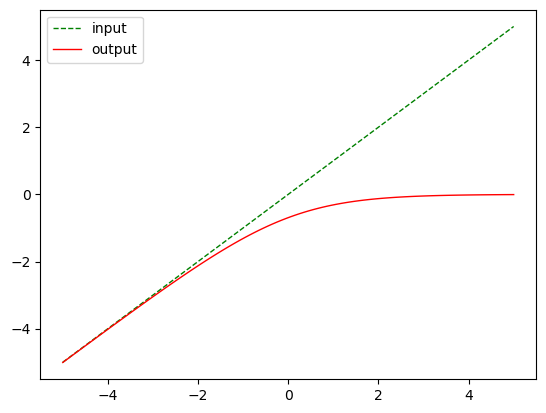

In [ ]:
plot_show(input, output)

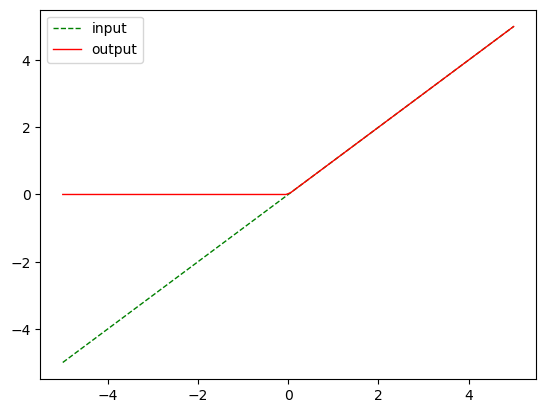

In [ ]:
m = nn.ReLU()
output = m(input)
plot_show(input, output)

### nn.Sigmoid()

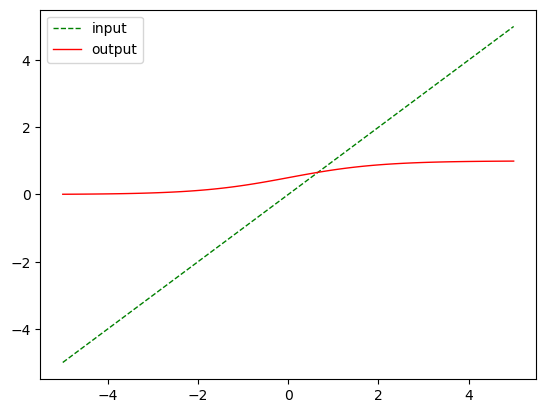

In [ ]:
m = nn.Sigmoid()
output = m(input)
plot_show(input, output)

### nn.Softplus()

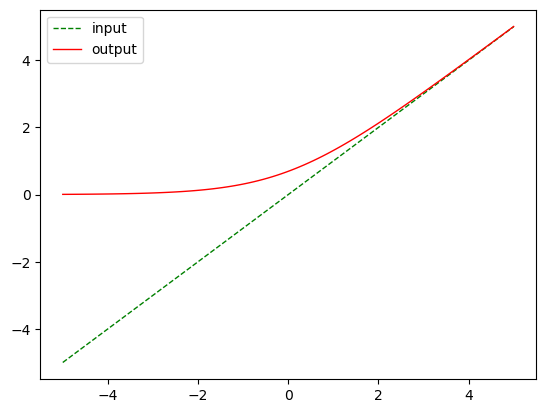

In [ ]:
m = nn.Softplus()
output = m(input)
plot_show(input, output)

### nn.Tanh()

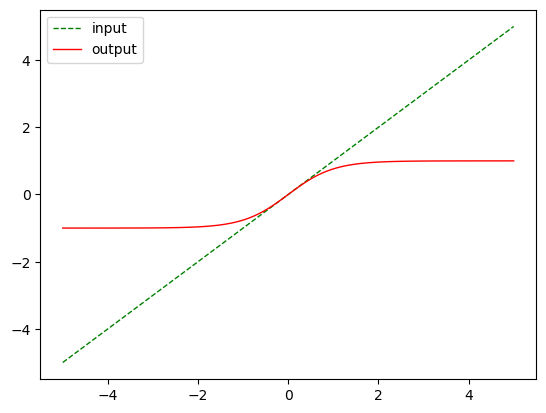

In [ ]:
m = nn.Tanh()
output = m(input)
plot_show(input, output)


### nn.Threshold

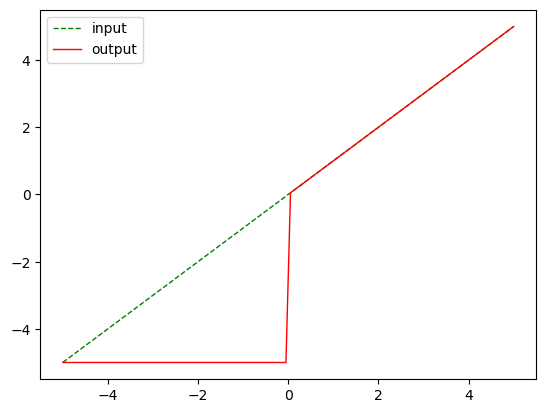

In [ ]:
m = nn.Threshold(0, -5)
output = m(input)
plot_show(input, output)


### nn.SELU

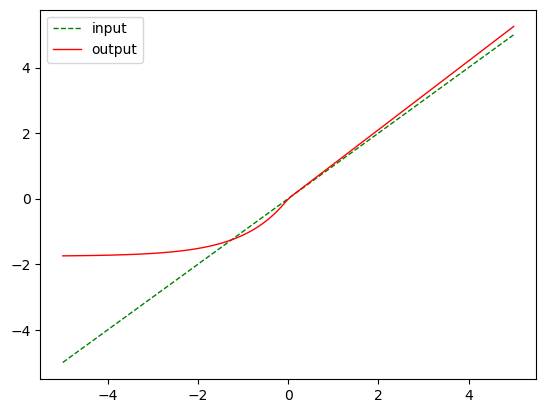

In [ ]:
m = nn.SELU()
output = m(input)
plot_show(input, output)

### Non-linear Activations (other)

In [ ]:
input = torch.linspace(-1,1,10)
input = input.reshape(2,5)
input

tensor([[-1.0000, -0.7778, -0.5556, -0.3333, -0.1111],
        [ 0.1111,  0.3333,  0.5556,  0.7778,  1.0000]])

In [ ]:
m = nn.Softmin(dim=1)

In [ ]:
output = m(input)

In [ ]:
output

tensor([[0.2970, 0.2379, 0.1905, 0.1525, 0.1221],
        [0.2970, 0.2379, 0.1905, 0.1525, 0.1221]])

In [ ]:
output.sum()

tensor(2.0000)

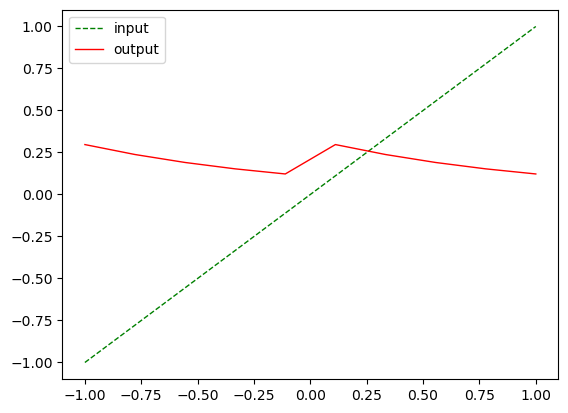

In [ ]:
plot_show(input.flatten(), output.flatten())

### Normalization Layers

### nn.BatchNorm2d

In [ ]:
input = torch.arange(27, dtype=torch.float).reshape(1,3, 3, 3)
input

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]],

         [[ 9., 10., 11.],
          [12., 13., 14.],
          [15., 16., 17.]],

         [[18., 19., 20.],
          [21., 22., 23.],
          [24., 25., 26.]]]])

In [ ]:
# With Learnable Parameters
m = nn.BatchNorm2d(3)
# Without Learnable Parameters
m = nn.BatchNorm2d(3, affine=False)

output = m(input)
output

tensor([[[[-1.5492e+00, -1.1619e+00, -7.7460e-01],
          [-3.8730e-01,  0.0000e+00,  3.8730e-01],
          [ 7.7460e-01,  1.1619e+00,  1.5492e+00]],

         [[-1.5492e+00, -1.1619e+00, -7.7460e-01],
          [-3.8730e-01,  1.7881e-07,  3.8730e-01],
          [ 7.7460e-01,  1.1619e+00,  1.5492e+00]],

         [[-1.5492e+00, -1.1619e+00, -7.7460e-01],
          [-3.8730e-01, -3.5763e-07,  3.8730e-01],
          [ 7.7460e-01,  1.1619e+00,  1.5492e+00]]]])

### nn.GroupNorm

In [ ]:
# Separate 6 channels into 3 groups
m = nn.GroupNorm(1, 3)
output = m(input)
output

tensor([[[[-1.6690e+00, -1.5407e+00, -1.4123e+00],
          [-1.2839e+00, -1.1555e+00, -1.0271e+00],
          [-8.9872e-01, -7.7033e-01, -6.4194e-01]],

         [[-5.1355e-01, -3.8516e-01, -2.5678e-01],
          [-1.2839e-01, -2.9802e-08,  1.2839e-01],
          [ 2.5678e-01,  3.8516e-01,  5.1355e-01]],

         [[ 6.4194e-01,  7.7033e-01,  8.9872e-01],
          [ 1.0271e+00,  1.1555e+00,  1.2839e+00],
          [ 1.4123e+00,  1.5407e+00,  1.6690e+00]]]],
       grad_fn=<NativeGroupNormBackward0>)

In [ ]:
input_t = torch.randn(20, 6, 10, 10)
# Separate 6 channels into 6 groups (equivalent with InstanceNorm)
m = nn.GroupNorm(6, 6)
output = m(input_t)

In [ ]:
# Put all 6 channels into a single group (equivalent with LayerNorm)
m = nn.GroupNorm(1, 6)
# Activating the module
output = m(input_t)

### nn.LayerNorm

In [ ]:
# NLP Example
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
output = layer_norm(embedding)


In [ ]:
embedding[7,:,:].std()

tensor(1.0733)

In [ ]:
output[7,:,:].std()

tensor(1.0101, grad_fn=<StdBackward0>)

## Recurrent Layers

> RNNBase - Base class for RNN modules (RNN, LSTM, GRU).

## nn.RNN

In [ ]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [ ]:
output.shape

torch.Size([5, 3, 20])

### nn.LSTM

In [ ]:
lstm = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = lstm(input, (h0, c0))
output.shape

torch.Size([5, 3, 20])

### nn.GRU

In [ ]:
gru = nn.GRU(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = gru(input, h0)
output.shape

torch.Size([5, 3, 20])

### nn.RNNCell

In [ ]:
rnn = nn.RNNCell(10, 20)
input = torch.randn(6, 3, 10)
hx = torch.randn(3, 20)
output = []
for i in range(6):
    hx = rnn(input[i], hx)
    output.append(hx)


## Transformer Layers

### nn.Transformer

In [ ]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

### nn.TransformerEncoderLayer

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)

### nn.TransformerDecoderLayer

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512)
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)

### nn.TransformerEncoderLayer

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
src = torch.rand(32, 10, 512)
out = encoder_layer(src)

### nn.TransformerDecoderLayer

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
memory = torch.rand(32, 10, 512)
tgt = torch.rand(32, 20, 512)
out = decoder_layer(tgt, memory)

## Linear Layers

### nn.Identity

> A placeholder identity operator that is argument-insensitive.

In [ ]:
m = nn.Identity(54, unused_argument1=0.1, unused_argument2=False)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 20])


### nn.Linear

In [ ]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [ ]:
for para in m.parameters():
    print(para.shape)

torch.Size([30, 20])
torch.Size([30])


### Dropout Layers

In [ ]:
m = nn.Dropout(p=0.2)
input = torch.randn(20, 16)
output = m(input)
output.shape

torch.Size([20, 16])

In [ ]:
m = nn.Dropout2d(p=0.2)
input = torch.randn(20, 16, 32, 32)
output = m(input)
output.shape

torch.Size([20, 16, 32, 32])

In [ ]:
m = nn.AlphaDropout(p=0.2)
input = torch.randn(20, 16)
output = m(input)
output.shape

torch.Size([20, 16])

In [ ]:
m = nn.FeatureAlphaDropout(p=0.2)
input = torch.randn(20, 16, 4, 32, 32)
output = m(input)
output.shape

torch.Size([20, 16, 4, 32, 32])

### Loss Functions

### nn.L1Loss

In [ ]:
input = torch.linspace(1,10,10, requires_grad=True)
target = torch.linspace(1.1, 10.1, 10, requires_grad=True)
input, target

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], requires_grad=True),
 tensor([ 1.1000,  2.1000,  3.1000,  4.1000,  5.1000,  6.1000,  7.1000,  8.1000,
          9.1000, 10.1000], requires_grad=True))

In [ ]:
loss = nn.L1Loss()
output = loss(input, target)
output

tensor(0.1000, grad_fn=<MeanBackward0>)

### nn.MSELoss

In [ ]:
loss = nn.MSELoss()
output = loss(input, target)
output

tensor(0.0100, grad_fn=<MseLossBackward0>)

### nn.CrossEntropyLoss

In [ ]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
output = loss(input, target)
output

tensor(195.1833, grad_fn=<DivBackward1>)

In [ ]:
loss = nn.GaussianNLLLoss()

var = torch.ones(10, requires_grad=True)  # heteroscedastic
output = loss(input, target, var)
output

tensor(0.0050, grad_fn=<MeanBackward0>)

## Vision Layers

Rearrange elements in a tensor according to an upscaling factor.

In [ ]:
pixel_shuffle = nn.PixelShuffle(3)
input = torch.randn(1, 9, 4, 4)
output = pixel_shuffle(input)
print(output.size())

torch.Size([1, 1, 12, 12])


In [ ]:
pixel_unshuffle = nn.PixelUnshuffle(3)
input = torch.randn(1, 1, 12, 12)
output = pixel_unshuffle(input)
print(output.size())

torch.Size([1, 9, 4, 4])
